In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [142]:
df=pd.read_csv('data\StudentsPerformance.csv')

In [143]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [144]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

independent and dependent feature

In [145]:
x=df.drop(columns='math score')
y=df['math score']

In [146]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [147]:
y.head(2)

0    72
1    69
Name: math score, dtype: int64

In [148]:
num_features= [feature for feature in x.columns if df[feature].dtypes!='O']
cat_features= [feature for feature in x.columns if df[feature].dtypes=='O']

In [149]:
print(f"numerical features are : {num_features}")
print(f"categorical features are : {cat_features}")

numerical features are : ['reading score', 'writing score']
categorical features are : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [150]:

preprocessor = ColumnTransformer(
    [
        ('StandardScaler', StandardScaler(), num_features),  
        ('OneHotencoder', OneHotEncoder(handle_unknown='ignore'), cat_features) 
    ]
)


In [151]:
x=preprocessor.fit_transform(x)

In [152]:
x

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [153]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [154]:
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [155]:
models ={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'KNN' : KNeighborsRegressor(),
    'RandomForest':RandomForestRegressor(),
    'XGboost':XGBRegressor(),
    'SVR': SVR(),
    'Adaboost':AdaBoostRegressor()

}

In [156]:
def evaluate(name,predicted):
    r2_ = r2_score(y_test,predicted)
    MSE = mean_squared_error(y_test,predicted)
    MAE = mean_absolute_error(y_test,predicted)
    print(f'{name} :')
    print(r2_score)
    print(MSE)
    print(MAE)

In [157]:

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{name}:")
    print(f"R2 Score: {r2:.4f}")
    print(f"MSE:      {mse:.4f}")
    print(f"MAE:      {mae:.4f}")
    print()


LinearRegression:
R2 Score: 0.8804
MSE:      29.0952
MAE:      4.2148

Ridge:
R2 Score: 0.8806
MSE:      29.0563
MAE:      4.2111

Lasso:
R2 Score: 0.8253
MSE:      42.5063
MAE:      5.1579

KNN:
R2 Score: 0.7838
MSE:      52.6170
MAE:      5.6190

RandomForest:
R2 Score: 0.8529
MSE:      35.7923
MAE:      4.6354

XGboost:
R2 Score: 0.8212
MSE:      43.5039
MAE:      5.1036

SVR:
R2 Score: 0.7286
MSE:      66.0420
MAE:      5.4015

Adaboost:
R2 Score: 0.8478
MSE:      37.0278
MAE:      4.7379



LINEAR REGRESSION IS PERFORMING BEST

In [159]:
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
r2=r2_score(y_test,y_pred)*100
print(f'accuracy of the model is : {r2}')


accuracy of the model is : 88.04332983749565


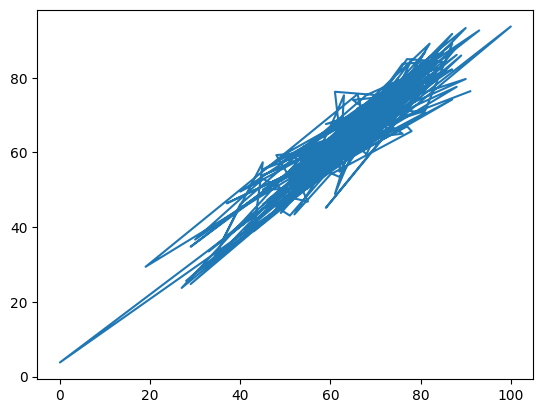

In [161]:
plt.plot(y_test,y_pred)

Text(0, 0.5, 'predicted value')

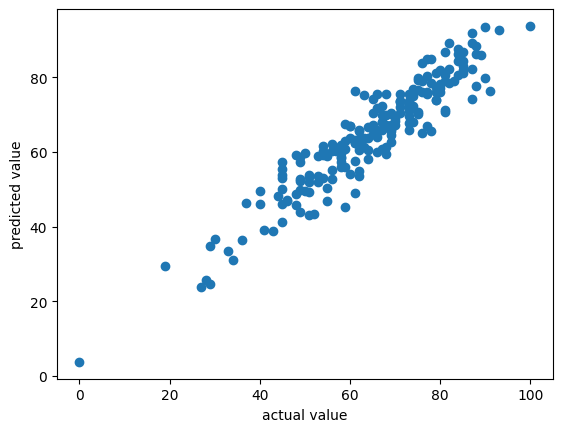

In [162]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual value')
plt.ylabel('predicted value')

<Axes: xlabel='math score'>

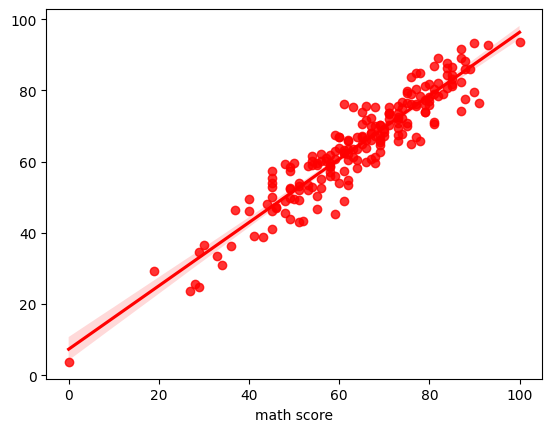

In [166]:
sns.regplot(x=y_test,y=y_pred,color="r")